In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import unicodedata
import itertools
import collections
import re
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import bigrams, trigrams
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

from bs4 import BeautifulSoup
from pprint import pprint
import urllib
from urllib.request import urlopen

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import (
    wordnet,
    stopwords
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\S

In [2]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\S\Desktop\#Winner Winner\data


In [3]:
test_data=pd.read_csv('test.csv')
train_data=pd.read_csv('train.csv')

In [4]:
#  Shape of Training and Test data
print(f"Shape of training dataset:{train_data.shape}")
print(f"Shape of test dataset:{test_data.shape}")

Shape of training dataset:(7274, 3)
Shape of test dataset:(1819, 2)


In [5]:
# look into training and test data
print(f"Training dataset")
train_data.head()

Training dataset


,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [6]:
print(f"Test dataset")
test_data.head()

Test dataset


,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [7]:
#Fetching sentiments from training data
# 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell
training_sentiments = dict(train_data['sentiment'].value_counts())
training_sentiments

{1: 4311, 2: 2382, 0: 456, 3: 125}

Text(0.5, 1.0, 'Distribution of Sentiments')

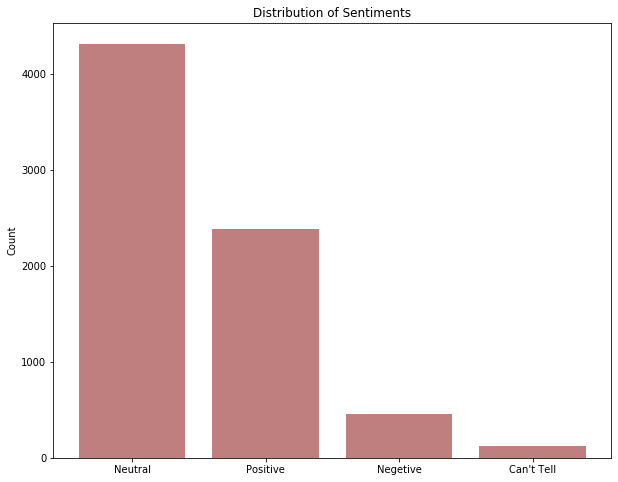

In [8]:
# Plot distribution of sentiments 
objects = ('Neutral', 'Positive', 'Negetive', 'Can\'t Tell')
y_pos = np.arange(len(training_sentiments))
plt.figure(figsize=(10,8))
plt.bar(y_pos, training_sentiments.values(), align='center', alpha=0.5 , color = 'maroon')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

In [9]:
#  Create dataframe for tweets of training dataset
tweets = pd.DataFrame(train_data['tweet'],columns =['tweet'])

In [10]:
tweets.shape

(7274, 1)


wordcloud for sentiments 0



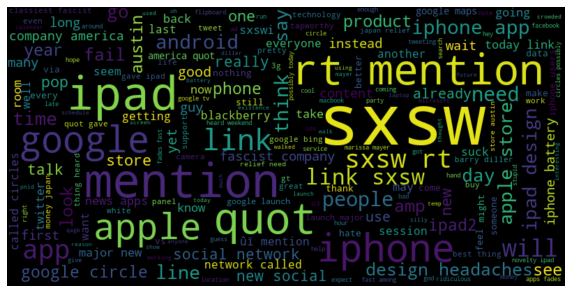


wordcloud for sentiments 1



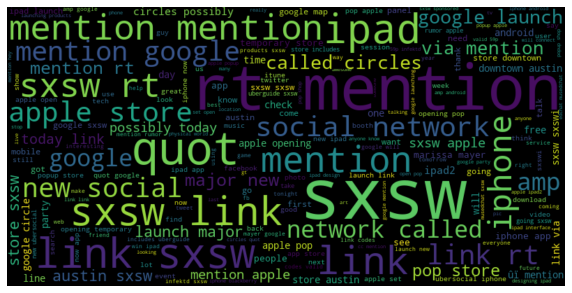


wordcloud for sentiments 2



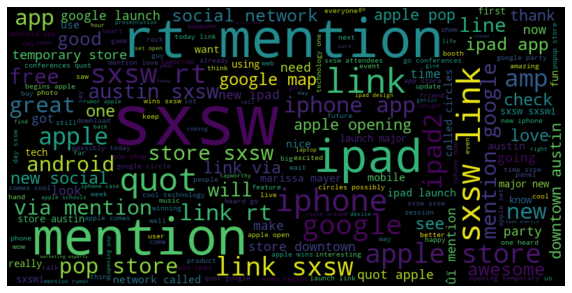


wordcloud for sentiments 3



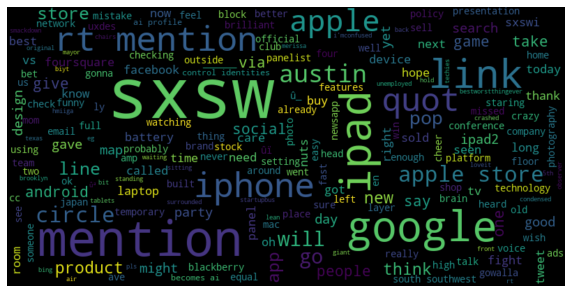

In [11]:
#  Creating wordcloud for sentiments
def create_wordcloud(sentiments):
  wordcloud = WordCloud(background_color='black',
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
  
  for i in range(len(sentiments)):
    print()
    print("wordcloud for sentiments", i)
    print()

    wordcloud.generate(sentiments[i])
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

sentiment_neutral  = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 1, 'tweet']])
sentiment_positive = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 2, 'tweet']])
sentiment_negative = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 0, 'tweet']])
sentiment_unknown  = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 3, 'tweet']])
sentiments = [sentiment_negative, sentiment_neutral, sentiment_positive, sentiment_unknown]
create_wordcloud(sentiments)

In [12]:
#  Find ReTweets
tweets['is_retweet'] = tweets['tweet'].astype(str).apply(lambda x: x[:2]=='RT')
tweets['is_retweet'].sum()

1586

In [13]:
# Finding top most repeated tweets
tweets.groupby(['tweet']).size().reset_index(name = 'counts').sort_values(by = 'counts',ascending=False).head(10)

,tweet,counts
5069,RT @mention Marissa Mayer: Google Will Connect...,5
5068,RT @mention Marissa Mayer: Google Will Connect...,4
4782,RT @mention Google to Launch Major New Social ...,3
3800,Need to buy an iPad2 while I'm in Austin at #s...,2
1669,"Before It Even Begins, Apple Wins #SXSW {link}",2
5692,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",2
5690,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,2
3651,Marissa Mayer: Google Will Connect the Digital...,2
4781,RT @mention Google to Launch Major New Social ...,2
2999,I just noticed DST is coming this weekend. How...,2


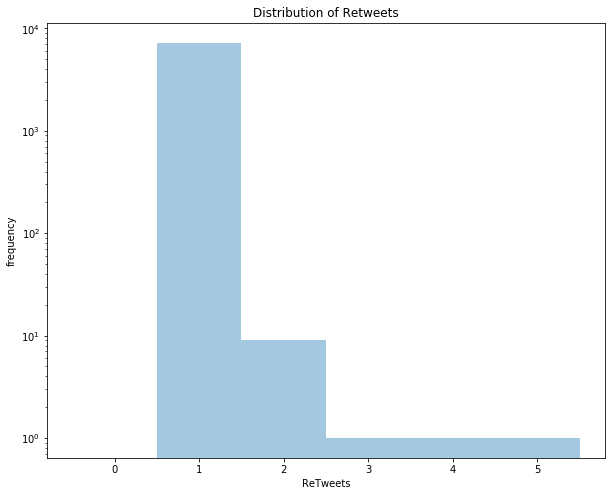

In [14]:
#  Distribution of ReTweets
counts = tweets.groupby(['tweet']).size().reset_index(name='counts').counts
plt.figure(figsize=(10,8))
sns.distplot(counts, bins = np.arange(0,counts.max()+2, 1)-0.5, kde=False)
plt.xlabel('ReTweets')
plt.ylabel('frequency')
plt.title('Distribution of Retweets')
plt.yscale('log', nonposy='clip')
plt.show()

In [15]:
#  Converting datatype of tweet column as string
tweets['tweet'] = tweets['tweet'].astype(str)

In [16]:
#  Functions to find Retweeted, Handlers and Hashtags
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [17]:
tweets['retweeted'] = tweets.tweet.apply(find_retweeted)
tweets['mentioned'] = tweets.tweet.apply(find_mentioned)
tweets['hashtags'] = tweets.tweet.apply(find_hashtags)

In [18]:
tweets.sample(10)

,tweet,is_retweet,retweeted,mentioned,hashtags
6429,Trying to pick up on a theme at #SXSW this yea...,False,[],[],"[#SXSW, #SXSW, #bolinsxsw]"
5467,Score! RT@mention Google handing out free pi f...,False,[],[@mention],"[#SXSW, #win]"
5534,@mention does the #iphone at the price point o...,False,[],[@mention],"[#iphone, #SXSW, #bolinsxsw]"
3160,#sxsw peeps who want an iPad2: {link} Brillia...,False,[],[],[#sxsw]
3610,.@mention Problem with Google Living Stories w...,False,[],[@mention],"[#hacknews, #SXSW]"
2462,@mention If you're near Zen on Guadalupe 3/19 ...,False,[],"[@mention, @mention]","[#iPhone, #SXSW]"
2650,Apple opening up temporary store in downtown A...,False,[],[],[#sxsw]
4684,ÛÏ@mention RT @mention - Marissa Mayer: Googl...,False,[@mention],[@mention],[#sxsw]
1605,@mention ahoy! let your readers know we'll kee...,False,[],[@mention],"[#sxsw, #eventseekr]"
3279,RT @mention Reactions to Google Circles news s...,True,[@mention],[],[#sxsw]


In [19]:
#  Extract list of Hashtags and Handlers for wordcloud
def extraction(lists):
  data_array = []
  for data in lists:
    for word in data:
      if(word):
        data_array.append(word.lower())
  return data_array

In [20]:
hashtags = extraction(tweets['hashtags'])
handlers = extraction(tweets['mentioned'])
print(hashtags)

['#sxswnui', '#sxsw', '#apple', '#googledoodle', '#sxsw', '#sxsw', '#sxsw', '#fuckit', '#illmakeitwork', '#sxsw', '#technews', '#tech_news', '#apple', '#ipad_2', '#sxsw', '#tablets', '#tech', '#sxsw', '#ipad', '#ubersocial', '#iphone', '#sxsw', '#mashable', '#sxsw', '#freemusic', '#sxsw', '#sxsw', '#android', '#iphone', '#ipad', '#sxsw', '#elevate', '#sxsw', '#techenvy', '#sxsw', '#zazzlsxsw', '#companies', '#sxsw', '#apps', '#features', '#hardware', '#ipad', '#iphone', '#sxsw', '#calyp', '#calyp', '#sxsw', '#sxsw', '#apple', '#ipad2', '#technology', '#itunes', '#sxsw', '#sxsw', '#doubleloser', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#rise_austin', '#sxsw', '#circles', '#sxsw', '#circles', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#startups', '#vc', '#movie', '#awesome', '#sxsw', '#apple', '#sxsw', '#sxsw', '#sxsw', '#ipad', '#sxsw', '#ipad', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#deferomobile', '#ipad2', '#sxsw', '#sxsw', '#apple', '#ipad2', '#sxsw', '#fb', '#sxsw', '#android', '#iphone', '#sm

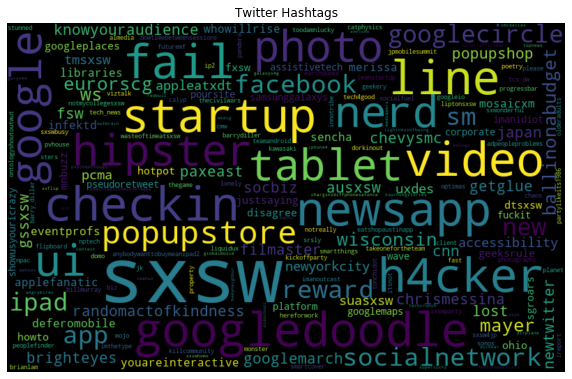

In [21]:
#  WordCloud for Hashtags
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,  background_color="black").generate(" ".join(set(hashtags)))
plt.figure(figsize=(10, 7))
plt.title('Twitter Hashtags')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Text(0, 0.5, 'frequency')

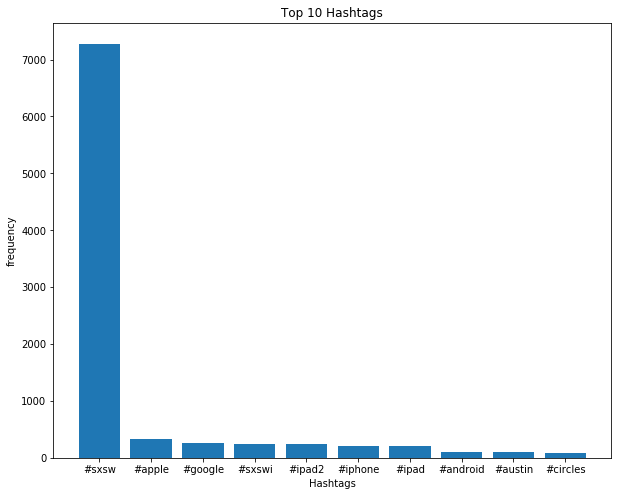

In [22]:
top_10_hashtags = dict(pd.Series(hashtags).value_counts()[:10])
plt.figure(figsize=(10,8))
plt.bar(top_10_hashtags.keys(),top_10_hashtags.values())
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('frequency')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

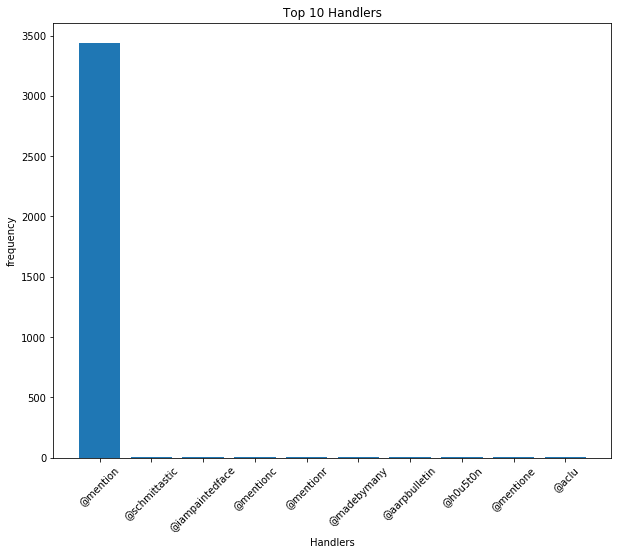

In [23]:
# Displaying frequently used Handlers 
top_10_handlers = dict(pd.Series(handlers).value_counts()[:10])
plt.figure(figsize=(10,8))
plt.bar(top_10_handlers.keys(),top_10_handlers.values())
plt.title('Top 10 Handlers')
plt.xlabel('Handlers')
plt.ylabel('frequency')
plt.xticks(rotation= 45)

In [24]:
actual_links = []
Invalid_links = []
for tweet in tweets['tweet']:
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet)
    for url in urls:
        try:
            res = urllib.request.urlopen(url)
            actual_url = res.geturl()
            actual_links.append(actual_url)
        except:
            Invalid_links.append(url)

In [25]:
#  Extract Title from actual links
links = []
title = []
for link in actual_links:
  html = urllib.request.urlopen(link)
  soup = BeautifulSoup(html,'lxml')
  title_text = soup.title
  if title_text:
    links.append(link)
    title.append(title_text.get_text())
  
df1 = pd.DataFrame()
df1['Links'] = links
df1['title'] = title
df1

,Links,title
0,http://twitpic.com/48j12p,Pics from the #apple #ipad2 line at #SXSW #fb
1,https://www.intech-bb.com/,Tech Inside - Tech for an ease
2,https://enterprise.foursquare.com/intersections/,Foursquare Intersections Blog
3,https://calendar.google.com/calendar/embed?src...,@hamsandwich SXSWi Calendar
4,https://www.tumblr.com/login_required/timkro/3...,Tumblr
5,https://www.facebook.com/events/141164002609303/,Facebook
6,https://www.forbes.com/sites/billbarol/2011/03...,Holler Gram is here
7,https://www.facebook.com/events/141164002609303/,Facebook
8,https://sites.google.com/site/frontgatesxsw11/,5th Annual Morning After Party
9,https://apps.apple.com/gb/app/the-guardian/id4...,‎The Guardian - Live World News on the App Store


In [26]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# SadEmoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [27]:
#  Happy and Sad Emoticons list
Happy_Smiley = []
temp_tweets = []
Sad_Smiley = []
for i,tweet in enumerate(tweets.tweet):
  for smiley in emoticons_happy:
    for word in tweet.split():
      if smiley == word:
        temp_tweets.append(1)
        Happy_Smiley.append(smiley)
  for smiley in emoticons_sad:
    for word in tweet.split():
      if smiley == word:
        temp_tweets.append(0)
        Sad_Smiley.append(smiley)

In [28]:
#  Finding Happy and Sad Ratio
happy = [x for x in temp_tweets if x == 1 ]
sad = [x for x in temp_tweets if x == 0 ]
print(f"Total number of Happy Tweets= {len(happy)}")
print(f"Happy Ratio : {len(happy)/len(temp_tweets)}")
print()
print(f"Total number of Sad Tweets= {len(sad)}")
print(f"Sad Ratio : {len(sad)/len(temp_tweets)}")

Total number of Happy Tweets= 150
Happy Ratio : 0.8670520231213873

Total number of Sad Tweets= 23
Sad Ratio : 0.1329479768786127


Text(0.5, 1.0, 'Happy Emoticons count')

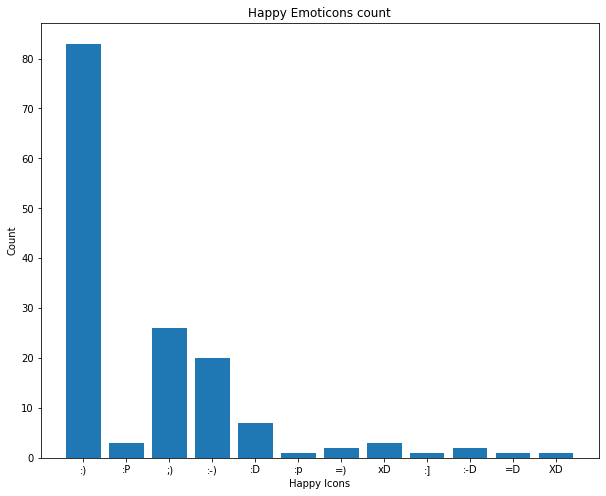

In [29]:
Happy_Icons = {x:Happy_Smiley.count(x) for x in Happy_Smiley}
plt.figure(figsize=(10,8))
plt.bar(Happy_Icons.keys(),Happy_Icons.values())
plt.xlabel('Happy Icons')
plt.ylabel('Count')
plt.title('Happy Emoticons count')

Text(0.5, 1.0, 'Sad Emoticons count')

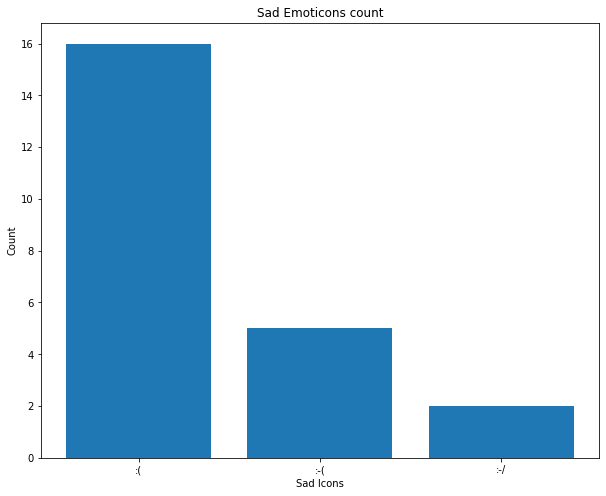

In [30]:
Sad_Icons = {x:Sad_Smiley.count(x) for x in Sad_Smiley}
plt.figure(figsize=(10,8))
plt.bar(Sad_Icons.keys(),Sad_Icons.values())
plt.xlabel('Sad Icons')
plt.ylabel('Count')
plt.title('Sad Emoticons count')

In [31]:
def preprocessing_text(table):
    #put everything in lowercase
    table['tweet'] = table['tweet'].str.lower()
    #Replace rt indicating that was a retweet
    table['tweet'] = table['tweet'].str.replace('rt', '')
    #Replace occurences of mentioning @UserNames
    table['tweet'] = table['tweet'].replace(r'@[^\s]+', 'AT_USER', regex=True)
    #Replace links contained in the tweet
    table['tweet'] = table['tweet'].replace(r'((www\.[^\s]+)|(https?://[^\s]+))', 'URL', regex=True)
    #remove numbers
    table['tweet'] = table['tweet'].replace(r'[0-9]+', '', regex=True)
    #replace special characters and puntuation marks
    table['tweet'] = table['tweet'].replace(r'[!"$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
    table['tweet'] = table['tweet'].replace(r'#([^\s]+)', r'\1', regex=True)
    return table

In [32]:
def stop_words(tweets):
    #We need to remove the stop words
    stop_words_list = stopwords.words('english') + ['sxsw','rt','mention','link','video','cont','in','get','via']
    tweets['tweet'] = tweets['tweet'].str.lower()
    tweets['tweet'] = tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
    return tweets

In [33]:
def in_dict(word):
    if wordnet.synsets(word):
        #if the word is in the dictionary, we'll return True
        return True

def replace_elongated_word(word):
    regex = r'(\w*)(\w+)\2(\w*)'
    repl = r'\1\2\3'    
    if in_dict(word):
        return word
    new_word = re.sub(regex, repl, word)
    if new_word != word:
        return replace_elongated_word(new_word)
    else:
        return new_word

def detect_elongated_words(row):
    regexrep = r'(\w*)(\w+)(\2)(\w*)'
    words = [''.join(i) for i in re.findall(regexrep, row)]
    for word in words:
        if not in_dict(word):
            row = re.sub(word, replace_elongated_word(word), row)
    return row

In [34]:
def replace_antonyms(word):
    #We get all the lemma for the word
    for syn in wordnet.synsets(word): 
        for lemma in syn.lemmas(): 
            #if the lemma is an antonyms of the word
            if lemma.antonyms(): 
                #we return the antonym
                return lemma.antonyms()[0].name()
    return word

In [35]:
def handling_negation(row):
    #Tokenize the row
    words = word_tokenize(row)
    speach_tags = ['JJ', 'JJR', 'JJS', 'NN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP']
    #We obtain the type of words that we have in the text, we use the pos_tag function
    tags = nltk.pos_tag(words)
    #Now we ask if we found a negation in the words
    tags_2 = ''
    if "n't" in words and "not" in words:
        tags_2 = tags[min(words.index("n't"), words.index("not")):]
        words_2 = words[min(words.index("n't"), words.index("not")):]
        words = words[:(min(words.index("n't"), words.index("not")))+1]
    elif "n't" in words:
        tags_2 = tags[words.index("n't"):]
        words_2 = words[words.index("n't"):] 
        words = words[:words.index("n't")+1]
    elif "not" in words:
        tags_2 = tags[words.index("not"):]
        words_2 = words[words.index("not"):]
        words = words[:words.index("not")+1] 
        
    for index, word_tag in enumerate(tags_2):
        if word_tag[1] in speach_tags:
            words = words+[replace_antonyms(word_tag[0])]+words_2[index+2:]
            break
            
    return ' '.join(words)

In [36]:
def cleaning_table(table):
    #This function will process all the required cleaning for the text in our tweets
    table = preprocessing_text(table)
    table['tweet'] = table['tweet'].apply(lambda x: detect_elongated_words(x))
    table['tweet'] = table['tweet'].apply(lambda x: handling_negation(x))
    table = stop_words(table)
    return table

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [38]:
train_data.dropna(inplace=True)

In [39]:
#start= time.time()
#print(time.time()- start)#

In [40]:
train_data

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [41]:
test_data = cleaning_table(test_data)

In [42]:
train_data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [43]:
pd.set_option('display.max_colwidth', -1)
print(train_data.tweet[:10])

0    #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                      
1    Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
2    one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}           
3    This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                  
4    Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                  
5    #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                            
6    SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad                 

In [44]:
from nltk.stem.porter import *
train_data['tokenized_tweet'] = [nltk.word_tokenize(x) for x in train_data['tweet']]
stemmer = PorterStemmer()
train_data['tokenized_tweet'] = train_data['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
train_data['tokenized_tweet'] = train_data['tokenized_tweet'].apply(lambda x: ' '.join(x))
train_data.head()

,tweet_id,tweet,sentiment,tokenized_tweet
0,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1,# sxswnui # sxsw # appl defin languag of touch with differ dialect becom smaller
1,1851,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1,"learn ab googl doodl ! all doodl should be light , funni & amp ; innov , with except for signific occas . # googledoodl # sxsw"
2,2689,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2,"one of the most in-your-fac ex . of steal the show in yr RT @ mention & quot ; At # sxsw , appl school the mkt expert & quot ; { link }"
3,4525,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,0,thi iphon # sxsw app would b pretti awesom if it did n't crash everi 10min dure extend brows . # fuckit # illmakeitwork
4,3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},1,line outsid the appl store in austin wait for the new ipad # sxsw { link }


In [45]:
test_data['tokenized_tweet'] = [nltk.word_tokenize(x) for x in test_data['tweet']]
stemmer = PorterStemmer()
test_data['tokenized_tweet'] = test_data['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data['tokenized_tweet'] = test_data['tokenized_tweet'].apply(lambda x: ' '.join(x))
test_data.head()

,tweet_id,tweet,tokenized_tweet
0,7506,audience q protyping tools use sketchboksharpie pens photoshop balsamic google docs axsure etc myprotype,audienc q protyp tool use sketchboksharpi pen photoshop balsam googl doc axsur etc myprotyp
1,7992,send best photos amp videos citizenjournalism cn irepo photography cyber iphone,send best photo amp video citizenjourn cn irepo photographi cyber iphon
2,247,atuser 's pic winning ipad unsix cc atuser atuser,atus 's pic win ipad unsix cc atus atus
3,7688,google marisa mayer mobile phone cursor physical location new version map fast real life like,googl marisa mayer mobil phone cursor physic locat new version map fast real life like
4,3294,google maps even cooler thought,googl map even cooler thought


In [46]:
print(train_data.shape)
print(test_data.shape)

(7273, 4)
(1819, 3)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [48]:
X = train_data['tokenized_tweet']
y = train_data['sentiment']

In [49]:
cv = CountVectorizer(stop_words=['english',"URL","rt","link","hashtags","amp","gt","quot","sxsw","bit","ly"], ngram_range=(1,2))
X = cv.fit_transform(X)

In [50]:
X.shape

(7273, 46909)

In [51]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state =150)

In [52]:
def run_model(X,y,models):
  X_train, X_test, v_train, v_test = tts(X,y,test_size=0.20,random_state=5)
  for model in models:
    _model = model()
    _model.fit(X_train,v_train)
    y_pred = _model.predict(X_test)
    print(f"Model Name: {model.__name__}")
    print(f"Classification Report:")
    print(f"{classification_report(v_test, y_pred)}")
    print(f"F1-Score: {f1_score(v_test, y_pred, average='weighted')}")
    print("**"*20)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [54]:
rf = RandomForestClassifier(random_state=78, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.6695986805937328
0.6338685890207232
              precision    recall  f1-score   support

           0       0.64      0.22      0.33       105
           1       0.68      0.89      0.77      1096
           2       0.64      0.37      0.47       582
           3       0.00      0.00      0.00        36

    accuracy                           0.67      1819
   macro avg       0.49      0.37      0.39      1819
weighted avg       0.65      0.67      0.63      1819



In [55]:
lr = LogisticRegression(random_state=78, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.685541506322155
0.6788399032791348
              precision    recall  f1-score   support

           0       0.39      0.39      0.39       105
           1       0.75      0.79      0.77      1096
           2       0.61      0.59      0.60       582
           3       0.00      0.00      0.00        36

    accuracy                           0.69      1819
   macro avg       0.44      0.44      0.44      1819
weighted avg       0.67      0.69      0.68      1819



In [56]:
ros = RandomOverSampler(random_state=77)
log = LogisticRegression(random_state=77)
X_sample1, y_sample1 = ros.fit_sample(X_train, y_train)
log.fit(X_sample1, y_sample1)
y_pred1 = log.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1, average='weighted'))
print(classification_report(y_test, y_pred1))

0.6888400219901044
0.6802046282587854
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       105
           1       0.75      0.80      0.77      1096
           2       0.62      0.58      0.60       582
           3       0.00      0.00      0.00        36

    accuracy                           0.69      1819
   macro avg       0.45      0.44      0.45      1819
weighted avg       0.67      0.69      0.68      1819



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-a6e234fd29a5>", line 1, in <module>
    final_predict=model.predict(test_data)
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\S\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\S\AppData\Roaming\Py

NameError: name 'model' is not defined